In [1]:
from tensor import *
from module import *
from keras.datasets import mnist
import keras
import numpy as np

2023-05-24 19:36:00.089532: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-24 19:36:00.138919: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-24 19:36:00.139814: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-24 19:36:01.670488: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
train_images = np.asarray(x_train, dtype=np.float32) / 255.0
test_images = np.asarray(x_test, dtype=np.float32) / 255.0
train_images = train_images.reshape(60000,784)
test_images = test_images.reshape(10000,784)
y_train = keras.utils.to_categorical(y_train)

In [14]:
def compute_loss(outputs, labels):
    # Avoid numerical instability by adding a small epsilon value
    epsilon = 1e-10

    # Apply softmax to convert logits into probabilities
    softmax_outputs = np.exp(outputs) / np.sum(np.exp(outputs), axis=1, keepdims=True)

    # Calculate the cross-entropy loss
    loss = -np.sum(labels * np.log(softmax_outputs + epsilon)) / outputs.shape[0]
    return loss

def compute_loss(outputs, labels):
    # Avoid numerical instability by adding a small epsilon value
    # epsilon = 1e-10

    # # Apply softmax to convert logits into probabilities
    # # e = outputs.exp()
    # softmax_outputs =  -labels * outputs.softmax().log().sum(axis = 1)

    # # Calculate the cross-entropy loss
    # # loss = -np.sum(labels * np.log(softmax_outputs + epsilon)) / outputs.shape[0]
    # loss = - (labels * (softmax_outputs + epsilon).log()).sum() / outputs.shape[0]
    epsilon = 1e-10

    log_probs =  (outputs.softmax()  + epsilon ).log()
    return -(labels*log_probs).sum(axis = 1).sum() / outputs.shape[0]

def accuracy(outputs, labels):
	batch_size = labels.shape[0]
	acc = np.sum(np.argmax(outputs.data,axis=1) == np.argmax(labels.data,axis=1))/batch_size
	return acc

In [15]:

model = Sequential(Linear(784, 20),ReLU(),Linear(20,10))	
optimizer = SGD(model.parameters(), lr = 0.01, momentum= 0.1)

In [16]:
batch_size = 32
steps = 2000
Wb = Tensor(np.random.randn(784,10))# new initialized weights for gradient descent
l,a = 0, 0
for step in range(steps):
  
  optimizer.zero_grad()
  ri = np.random.permutation(train_images.shape[0])[:batch_size]
  Xb, yb = Tensor(train_images[ri]), Tensor(y_train[ri])
  y_predW = model(Xb)
#   probs = y_predW.softmax()

#   log_probs = probs.log()

#   zb = yb*log_probs

#   outb = zb.sum(axis = 1)
#   finb = -outb.sum()  #cross entropy loss

#   finb.backward()
  loss = compute_loss(y_predW,yb)
  loss.backward()
  a += accuracy(y_predW,yb)
#   l += compute_loss(y_predW.data,yb.data)
  l += loss.data

  if step%100==99:
    print(f'step {step} loss {l/100} acc {a/100}')
    l,a = 0,0
  optimizer.step()


step 99 loss 2.3009580500718134 acc 0.145625
step 199 loss 2.2959988810667356 acc 0.26125
step 299 loss 2.2841695745260275 acc 0.243125
step 399 loss 2.2534544952196787 acc 0.236875
step 499 loss 2.1981088552032144 acc 0.2240625
step 599 loss 2.088921088320194 acc 0.2971875
step 699 loss 1.9231960731854008 acc 0.43
step 799 loss 1.7082395528723495 acc 0.525625
step 899 loss 1.4742489977432895 acc 0.5875
step 999 loss 1.2663558020234738 acc 0.675
step 1099 loss 1.1165388183799443 acc 0.7071875
step 1199 loss 0.9921086099698283 acc 0.728125
step 1299 loss 0.9017088363949038 acc 0.7584375
step 1399 loss 0.8380005359629729 acc 0.7728125
step 1499 loss 0.7490998328072385 acc 0.8034375
step 1599 loss 0.6963327201446085 acc 0.81875
step 1699 loss 0.672076321020737 acc 0.81875
step 1799 loss 0.6228578793584245 acc 0.825625
step 1899 loss 0.6000886690152163 acc 0.8309375
step 1999 loss 0.566661416270486 acc 0.845625


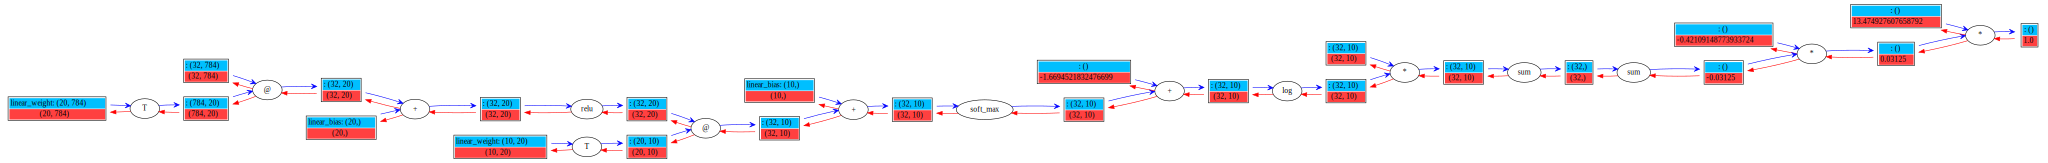

In [18]:
visualizer = ForwardGraphVisualizer()
rankdir = "LR"
# visualizer.visualize( model(Xb),rankdir=rankdir)
visualizer.visualize(loss,rankdir=rankdir)

In [17]:
loss

Tensor(0.42109148773933724) grad = 1.0